In [1]:
from grafo import Grafo
import pandas as pd
import networkx as nx

In [2]:
cruces = pd.read_csv("data/cruces_clean.csv")
calles = pd.read_csv("data/direcciones_clean.csv")
g = Grafo(True)

In [3]:
cruces.drop_duplicates(["x", "y"])

,id_via,nombre_via,id_via_cruzada,nombre_via_cruzada,x,y
4259,19135,CALLE DEL ALCALDE GARRIDO JUARISTI,951,CALLE DE FÉLIX RODRÍGUEZ DE LA FUENTE,44431285,447413227
35873,31000533,CALLE DE SALVADOR VICENTE MARTÍN,31000305,CALLE DEL HALCONERO DEL REY,43802426,446937006
23377,504400,CALLE DE MESENA,597500,CALLE DE PIQUER,44390865,447987153
34010,775200,CALLE DE VENTURA RODRÍGUEZ,295600,CALLE DE FERRAZ,43946517,447522847
22186,475550,CALLE DE MARÍA ISABEL NAVARRO,629950,CALLE DE RAMÓN GÓMEZ DE LA SERNA,43842182,448200820
...,...,...,...,...,...,...
4569,26700,CALLE DE ALFONSO MARTÍNEZ CONDE,2400,AVENIDA DE ABRANTES,43831183,447049345
29848,665400,AVENIDA DE SAN DIEGO,720700,CALLE DE LA SIERRA DE VALDEMECA,44317649,447135222
16667,334900,CALLE DE GENSERICO,258800,CALLE DE ÉGICA,43774472,447354818
4077,18600,AVENIDA DE LA ALBUFERA,573400,CALLE DE PEDRO LABORDE,44521848,447147987


In [4]:
calles["orden"] = calles["Direccion completa"].str.replace(r"\d+", lambda m: chr(int(m.group(0))), regex=True)
calles

,Direccion completa,Codigo de via,x,y,orden
0,AUTOV A-1 1000 EN,31001337,44305633,448250340,AUTOV A- Ϩ EN
1,AUTOV A-1 1000 SA,31001337,44312246,448249077,AUTOV A- Ϩ SA
2,AUTOV A-1 1100 EN,31001337,44367522,448330933,AUTOV A- ь EN
3,AUTOV A-1 1100 SA,31001337,44373755,448325151,AUTOV A- ь SA
4,AUTOV A-1 1200 EN,31001337,44425207,448408185,AUTOV A- Ұ EN
...,...,...,...,...,...
210352,PASEO ZURRÓN 49,725,45051964,448025888,PASEO ZURRÓN 1
210353,PASEO ZURRÓN 51,725,45058080,448025960,PASEO ZURRÓN 3
210354,PASEO ZURRÓN 53,725,45061025,448027575,PASEO ZURRÓN 5
210355,PASEO ZURRÓN 55,725,45063500,448027080,PASEO ZURRÓN 7


In [5]:
calles.drop_duplicates("Codigo de via")

,Direccion completa,Codigo de via,x,y,orden
0,AUTOV A-1 1000 EN,31001337,44305633,448250340,AUTOV A- Ϩ EN
8,AUTOV A-2 500 EN,31001336,44469993,447782563,AUTOV A- Ǵ EN
37,AUTOV A-3 400 EN,31001342,44439783,447321577,AUTOV A- Ɛ EN
77,AUTOV A-4 400 EN,31001334,44167422,447063954,AUTOV A- Ɛ EN
96,AUTOV A-42 500 EN,31001341,43905717,447000585,AUTOV A-* Ǵ EN
...,...,...,...,...,...
210105,ZURBANO 1,807000,44124688,447560119,ZURBANO 
210206,ZURBARÁN 1,807100,44106724,447590046,ZURBARÁN 
210233,ZURICH 1,2462,44840460,447486805,ZURICH 
210258,ZURITA 1,807300,44088069,447375916,ZURITA 


In [6]:
def asociar(row: pd.Series):
    df = calles[calles["Codigo de via"] == row["id_via"]]
    if df.empty:
        return "None"
    df["distance"] = df.apply(lambda row2: (row["x"]-row2["x"])**2+(row["y"]-row2["y"])**2, axis=1)
    return df.loc[int(df["distance"].idxmax())]["orden"]

In [7]:
cruces["direccion_asociada"] = cruces.apply(asociar, axis=1)
cruces

,id_via,nombre_via,id_via_cruzada,nombre_via_cruzada,x,y,direccion_asociada
4259,19135,CALLE DEL ALCALDE GARRIDO JUARISTI,951,CALLE DE FÉLIX RODRÍGUEZ DE LA FUENTE,44431285,447413227,ALCALDE GARRIDO JUARISTI 
35873,31000533,CALLE DE SALVADOR VICENTE MARTÍN,31000305,CALLE DEL HALCONERO DEL REY,43802426,446937006,SALVADOR VICENTE MARTÍN \t
23377,504400,CALLE DE MESENA,597500,CALLE DE PIQUER,44390865,447987153,MESENA m
34010,775200,CALLE DE VENTURA RODRÍGUEZ,295600,CALLE DE FERRAZ,43946517,447522847,VENTURA RODRÍGUEZ 
22186,475550,CALLE DE MARÍA ISABEL NAVARRO,629950,CALLE DE RAMÓN GÓMEZ DE LA SERNA,43842182,448200820,MARÍA ISABEL NAVARRO 
...,...,...,...,...,...,...,...
16667,334900,CALLE DE GENSERICO,258800,CALLE DE ÉGICA,43774472,447354818,GENSERICO 
7333,88200,CALLE DE BAILÉN,376500,CALLE DE IRÚN,43943349,447515548,BAILÉN 3
4077,18600,AVENIDA DE LA ALBUFERA,573400,CALLE DE PEDRO LABORDE,44521848,447147987,AVDA ALBUFERA 
32637,735300,PLAZA DE TARIFA,572700,CALLE DE PEDRO DOMINGO,43810333,447087595,PZ TARIFA 


In [8]:
for _, cruce in cruces.drop_duplicates(["x", "y"]).iterrows():
    g.agregar_vertice((cruce["x"], cruce["y"]))

In [9]:
c = 0
for via in cruces["nombre_via"].unique():
    df = cruces[cruces["nombre_via"] == via]
    df = df.sort_values(by="direccion_asociada")
    for i in range(df.shape[0]-1):
        r1 = df.iloc[i]
        r2 = df.iloc[i+1]
        if (r1["x"], r1["y"]) != (r2["x"], r2["y"]):
            g.agregar_arista(s=(r1["x"], r1["y"]), t=(r2["x"], r2["y"]), data=via, weight=1) # Agregar peso
        c += 1

print(c)

1757


In [10]:
len(g.aristas)

1683

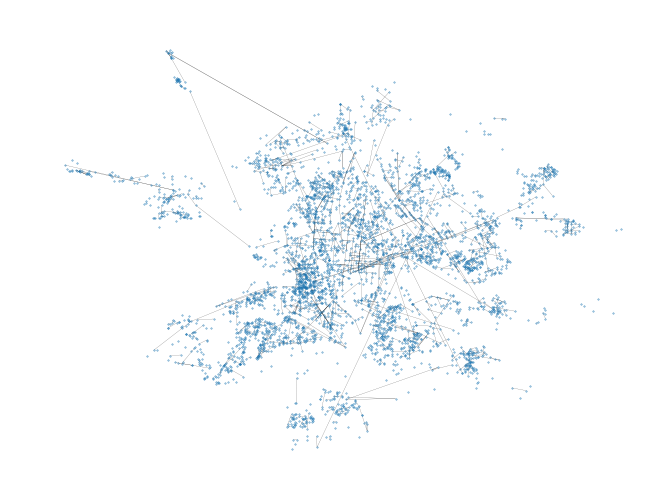

In [11]:
G = g.convertir_a_NetworkX()
nx.draw(G, pos={k: k for k in g.adj.keys()}, node_size=0.1, arrows=False, width=0.1)

In [ ]:
g.kruskal()

In [13]:
g.save_graph("plano_de_madrid.txt")